In [325]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns



In [326]:
df = pd.read_excel(r'C:\Users\Dell\OneDrive\Desktop\advance web scraping\Nakri_data_set\Skill_Gap_Analysis_Tool\Data\Finall_data.xlsx')
dfprice = pd.read_excel(r'C:\Users\Dell\OneDrive\Desktop\advance web scraping\Nakri_data_set\Skill_Gap_Analysis_Tool\Data\with_price.xlsx')

In [327]:
# temp

In [328]:
df.columns

Index(['Job_role', 'Company', 'job_pay', 'location', 'review',
       'Job post length', 'min_year', 'max_year', 'more_branch', '+3_branches',
       'days', 'skill_1', 'skill_2', 'skill_3', 'skill_4', 'skill_5',
       'skill_6', 'skill_7', 'skill_8', 'is_remote', 'norm_review',
       'norm_branches', 'norm_max_year', 'composite_score', 'Company Size',
       'Job Category', 'Primary Skill Category'],
      dtype='object')

###                   EDA PROCESS


##### We have 28 column WE WILL DO EDA ONE BY ONE TO EACH OF THEM 

# First column JOB_ROLE 

- *Conclusion*
    - Data is scapped from a website so its Very messy 
    - So in job role columns there are jobs which are like writeen diffrently but is same so we have to clean them 
    - 6200 diff... type of Job roles So we have to make them up to 100 or 500 atleast to do some thing with data 
    - 
    - 

In [329]:
df['Job_role'].describe()

count                  10163
unique                  6088
top       Software Developer
freq                     367
Name: Job_role, dtype: object

In [330]:
df['Job_role'].value_counts()

Software Developer                               367
Data Analyst                                     280
Data Scientist                                   145
Content Writer                                   138
Data Engineer                                    109
                                                ... 
Business Analytics Specialist                      1
Sap Business Warehouse Developer                   1
SR. MIS EXECUTIVE                                  1
Business Analytics Professional                    1
Email Support Associate For international BPO      1
Name: Job_role, Length: 6088, dtype: int64

<Axes: >

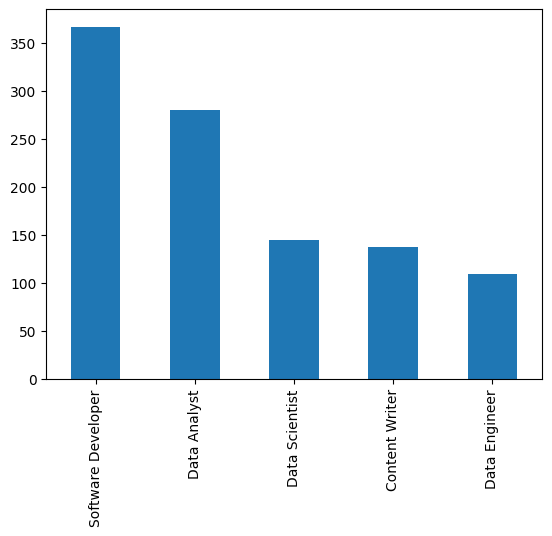

In [331]:
df['Job_role'].value_counts().head().plot(kind='bar')


<Axes: >

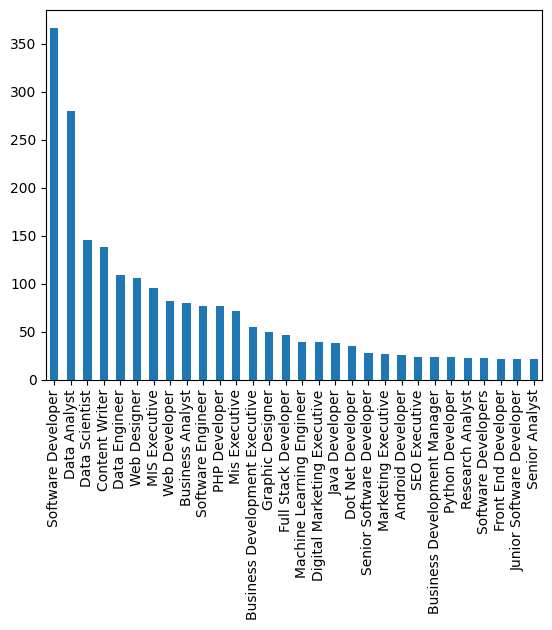

In [332]:
df['Job_role'].value_counts().head(30).plot(kind='bar')

In [333]:
# To clean Data Analyist Role
### post to replace with 
# Senior
# Junior
# Sr.
# Jr.
# Sr
# Jr

# # # Junior
# ASSISTANT  
# Associate  
# Intern  
# Fresher  

# # # senior
# Trainer  
# Executive  
# Advanced  
# Master  
def clean_job_roles(column):
    senior_terms = ['Senior','senior', 'sr.',' sr. ', 'sr', 'trainer', 'executive', 'advanced', 'master']
    junior_terms = ['jr.', 'junior', 'jr', 'assistant', 'associate', 'intern', 'fresher']
    cleaned_roles = []
    
    for role in column:
        role_lower = role.strip().lower()
        if 'data analyst' in role_lower:
            if any(term in role_lower for term in senior_terms):
                cleaned_roles.append('Sr. Data Analyst')
            elif any(term in role_lower for term in junior_terms):
                cleaned_roles.append('Jr. Data Analyst')
            elif role_lower == 'data analyst':
                cleaned_roles.append('Data Analyst')
            elif role_lower != 'data analyst':
                cleaned_roles.append('Data Analyst')
            else:
                 cleaned_roles.append(role)
        else:
             cleaned_roles.append(role)
    
    return cleaned_roles
df['Job_role'] = clean_job_roles(df['Job_role'])


In [334]:
# Manually Data Analyics clean up
df['Job_role'] = df['Job_role'].str.replace('SEO Analyst','Sr. Data Analyst')
df['Job_role'] = df['Job_role'].str.replace('Market Sr. Data Analyst','Sr. Data Analyst')
df['Job_role'] = df['Job_role'].str.replace('Senior Analyst','Sr. Data Analyst')
df['Job_role'] = df['Job_role'].str.replace('S&C Global Network - AI - Supply Chain Analytics - Analyst','Sr. Data Analyst')
df['Job_role'] = df['Job_role'].str.replace('Research Analyst','Sr. Data Analyst')
df['Job_role'] = df['Job_role'].str.replace('Tax Senior Analyst','Sr. Data Analyst')
df['Job_role'] = df['Job_role'].str.replace('Market Research Analyst','Sr. Data Analyst',)
df['Job_role'] = df['Job_role'].str.replace('Quality Analyst','Sr. Data Analyst')
df['Job_role'] = df['Job_role'].str.replace('Data Sr. Data Analyst','Sr. Data Analyst')
df['Job_role'] = df['Job_role'].str.replace('Product Analyst','Sr. Data Analyst')
df['Job_role'] = df['Job_role'].str.replace('Marketing Analyst','Business Analyst')
df['Job_role'] = df['Job_role'].str.replace('Web Analyst','Jr. Data Analyst')
df['Job_role'] = df['Job_role'].str.replace('Associate Business Analyst','Jr. Data Analyst')
df['Job_role'] = df['Job_role'].str.replace('Content Analyst','Jr. Data Analyst')
df['Job_role'] = df['Job_role'].str.replace('Fundamental Analyst','Jr. Data Analyst')
df['Job_role'] = df['Job_role'].str.replace('Data Research Analyst','Jr. Data Analyst')
df['Job_role'] = df['Job_role'].str.replace('Senior Business Analyst','Business Analyst')
df['Job_role'] = df['Job_role'].str.replace('Business Intelligence Analyst','Business Analyst')
df['Job_role'] = df['Job_role'].str.replace('Financial, Data Modeling & Research Analyst','Business Analyst')
df['Job_role'] = df['Job_role'].str.replace('Technical Business Analyst','Business Analyst')
df['Job_role'] = df['Job_role'].str.replace('Mis Analyst','Business Analyst')
df['Job_role'] = df['Job_role'].str.replace('MIS Analyst','Business Analyst')
df['Job_role'] = df['Job_role'].str.replace('MIS Executive and Analyst','Business Analyst')
df['Job_role'] = df['Job_role'].str.replace('Market Analyst','Business Analyst')
df['Job_role'] = df['Job_role'].str.replace('Reporting Analyst','Business Analyst')
df['Job_role'] = df['Job_role'].str.replace('Operations Analyst','Business Analyst')
df['Job_role'] = df['Job_role'].str.replace('GIS Analyst','Business Analyst')
df['Job_role'] = df['Job_role'].str.replace('Digital Marketing Analyst','Business Analyst')
df['Job_role'] = df['Job_role'].str.replace('Financial Analyst','Business Analyst')
df['Job_role'] = df['Job_role'].str.replace('Cost Analyst','Business Analyst')
df['Job_role'] = df['Job_role'].str.replace('Finance Analyst','Business Analyst')
df['Job_role'] = df['Job_role'].str.replace('Digital Business Analyst','Business Analyst')
df['Job_role'] = df['Job_role'].str.replace('Sr. Business Analyst','Business Analyst')
df['Job_role'] = df['Job_role'].str.replace('Project Analyst','Data Analyst')
df['Job_role'] = df['Job_role'].str.replace('Ad Business Analyst','Data Analyst')
df['Job_role'] = df['Job_role'].str.replace('GN-Comms & Media- Non Networks - Analyst','Data Analyst')
df['Job_role'] = df['Job_role'].str.replace('Associate Hospitality Revenue Optimization Analyst','Data Analyst')
df['Job_role'] = df['Job_role'].str.replace('S&C Global Network - AI - Healthcare Analytics - Analyst - Analyst','Data Analyst')
df['Job_role'] = df['Job_role'].str.replace('SAS Analyst','Data Analyst')
df['Job_role'] = df['Job_role'].str.replace('Actuarial Analyst','Data Analyst')
df['Job_role'] = df['Job_role'].str.replace('Data Integrity Analyst','Data Analyst')
df['Job_role'] = df['Job_role'].str.replace('Analyst - Data Science','Data Scienctist')
df['Job_role'] = df['Job_role'].str.replace('Analyst - S&C Global Network - AI - Resources - Data Science Analyst','Data Scienctist')
df['Job_role'] = df['Job_role'].str.replace('S&C Global Network - AI - Resources - Data Science Analyst','Data Scienctist')
df['Job_role'] = df['Job_role'].str.replace('S&C Global Network - AI - Healthcare Analytics - Analyst','Data Scienctist')


C:\Users\Dell\AppData\Local\Temp\ipykernel_26244\39990325.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Job_role'] = df['Job_role'].str.replace('Market Sr. Data Analyst','Sr. Data Analyst')
C:\Users\Dell\AppData\Local\Temp\ipykernel_26244\39990325.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Job_role'] = df['Job_role'].str.replace('Data Sr. Data Analyst','Sr. Data Analyst')
C:\Users\Dell\AppData\Local\Temp\ipykernel_26244\39990325.py:34: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Job_role'] = df['Job_role'].str.replace('Sr. Business Analyst','Business Analyst')


In [335]:
# To clean Data Scientist Role
def clean_job_roles(columns):
    junior = ['associate','assistant','applied','junior']
    senior = ['senior','sr.','mL','machine Learning']
    cleaned_column = []

    for i in columns:
        role_lower = i.strip().lower()
        if 'data scientist' in role_lower:
            if any(term in role_lower for term in junior):
                cleaned_column.append('Jr. Data Scientist')
            elif any(term in role_lower for term in senior):
                cleaned_column.append('Sr. Data Scientist')
            elif role_lower == 'data scientist':
                cleaned_column.append('Data Scientist')
            elif role_lower != 'data scientist':
                cleaned_column.append('Data Scientist')
            else:
                 cleaned_column.append(i)
        else:
             cleaned_column.append(i)
    return cleaned_column
    
df['Job_role'] = clean_job_roles(df['Job_role'])

In [336]:
#Data Scientist clean up
df['Job_role'] = df['Job_role'].str.replace('Scientific Software Developer','Software Developer')
df['Job_role'] = df['Job_role'].str.replace('Scientific Administrative Assistant','Jr. Data Scientist')
# df['Job_role'] = df['Job_role'].str.replace('Data Scienctist','Sr. Data Scientist')

def clean_job_roles(columns):
    junior = ['jr.','associate','assistant','applied','junior']
    senior = ['ai','senior','sr.','mL','machine Learning']

    cleaned_column = []

    for i in columns:
        role_lower = i.strip().lower()
        if 'scientist' in role_lower:
            if any(term in role_lower for term in junior):
                cleaned_column.append('Jr. Data Scientist')
            elif any(term in role_lower for term in senior):
                cleaned_column.append('Sr. Data Scientist')
            elif role_lower != 'data scientist':
                cleaned_column.append('Data Scientist')
            else:
                 cleaned_column.append(i)
        else:
             cleaned_column.append(i)
    return cleaned_column
df['Job_role'] = clean_job_roles(df['Job_role'])

In [337]:
# Software Engineer Clean Up Function

def clean_job_roles(columns):
    senior = ['senior','sr.','mL','machine Learning']
    junior = ['jr.','associate','assistant','applied','junior']


    cleaned_column = []

    for i in columns:
        role_lower = i.strip().lower()
        if 'software engineer' in role_lower:
            if any(term in role_lower for term in junior):
                cleaned_column.append('Jr. Software Engineer')
            elif any(term in role_lower for term in senior):
                cleaned_column.append('Sr. Software Engineer')
            elif role_lower != 'software engineer':
                cleaned_column.append('Software Engineer')
            else:
                 cleaned_column.append(i)
        else:
             cleaned_column.append(i)
    return cleaned_column
df['Job_role'] = clean_job_roles(df['Job_role'])


In [338]:
# manual cleaning Data Scientist
df['Job_role'] = df['Job_role'].str.replace('Machine Learning Engineer','Data Scientist')
df['Job_role'] = df['Job_role'].str.replace('AI / ML Engineer','Data Scientist')
df['Job_role'] = df['Job_role'].str.replace('ML Engineer','Data Scientist')
df['Job_role'] = df['Job_role'].str.replace('Deep Learning Engineer','Data Scientist')
df['Job_role'] = df['Job_role'].str.replace('Data Science Engineer','Data Scientist')
df['Job_role'] = df['Job_role'].str.replace('AI Engineer','Data Scientist')
df['Job_role'] = df['Job_role'].str.replace('Mis Executive','MIS Executive')
df['Job_role'] = df['Job_role'].str.replace('Chatbot Developer','Data Scientist')
df['Job_role'] = df['Job_role'].str.replace('Associate Data Scientist','Data Scientist')

In [339]:
df['Job_role'].value_counts().head(20)

Data Analyst                      416
Software Developer                368
Software Engineer                 344
Data Scientist                    325
MIS Executive                     166
Sr. Data Analyst                  161
Business Analyst                  142
Content Writer                    138
Data Engineer                     109
Web Designer                      106
Sr. Software Engineer             104
Web Developer                      82
PHP Developer                      77
Business Development Executive     55
Graphic Designer                   50
Full Stack Developer               46
Jr. Data Analyst                   41
Digital Marketing Executive        39
Java Developer                     38
Dot Net Developer                  35
Name: Job_role, dtype: int64

In [340]:
# Software Engineer Clean Up Function
def clean_job_roles(columns):
    senior = ['senior','sr.','mL','machine Learning','Professional']
    junior = ['jr.','associate','assistant','support','applied','junior']
    Data = ['data','qa','IoT','sql','machine learning','mlops']


    cleaned_column = []

    for i in columns:
        role_lower = i.strip().lower()
        if 'Software Engineer'.lower() in role_lower:
            if any(term in role_lower for term in Data):
                cleaned_column.append('Data Engineer')
            elif any(term in role_lower for term in junior):
                cleaned_column.append('Jr. Software Engineer')
            elif any(term in role_lower for term in senior):
                cleaned_column.append('Sr. Software Engineer')
            elif role_lower != 'software engineer':
                cleaned_column.append('Software Engineer')
            else:
                cleaned_column.append(i)
        else:
              cleaned_column.append(i)
    return cleaned_column
df['Job_role'] = clean_job_roles(df['Job_role'])

In [341]:
# Software Devloper Clean Up Function
def clean_job_roles(columns):
    senior = ['lead','sr','senior','sr.','mL','machine Learning','Professional']
    junior = ['jr.','jr','associate','assistant','support','applied','junior']
    Data = ['data','sql','machine learning','mlops']


    cleaned_column = []

    for i in columns:
        role_lower = i.strip().lower()
        if 'software developer' in role_lower:
            if any(term in role_lower for term in Data):
                cleaned_column.append('Data Engineer')
            elif any(term in role_lower for term in junior):
                cleaned_column.append('Jr. Software Developer')
            elif any(term in role_lower for term in senior):
                cleaned_column.append('Sr. Software Developer')
            elif role_lower == 'software developer':
                cleaned_column.append('Software Developer')
            elif role_lower != 'software developer':
                cleaned_column.append('Software Developer')
            else:
                cleaned_column.append(i)
        else:
              cleaned_column.append(i)
    return cleaned_column
df['Job_role'] = clean_job_roles(df['Job_role'])

In [342]:
# Menual cleaning Software Developer
web_list = ['Backend Developer','Frontend Developer','React Developer','React Native Developer',                        
'Flutter Developer',                             
'UI Developer',                                  
'Website Developer',                             
'PHP Software Developer',                        
'Angular Developer',                             
'Shopify Developer',                             
'Wordpress Developer',                           
'Salesforce Developer',                           
'Software Developers',                            
'Fullstack Developer',                            
'Back End Developer',                             
'React JS Developer',                             
'SQL Developer',                                  
'PHP Web Developer',                              
'Node JS Developer',                              
'Ruby on Rails Developer',
'Web Developers','Senior Web Developer','Magento Developer','Junior Web Developer','Front-end Developer','MERN Stack Developer','Node.js Developer','Node.js Developer','Front-End Developer','Fullstack Web Developer','Web Software Developer','Front - End Developer']    

df['Job_role'] = df['Job_role'].str.replace('Software developer','Software Developer')
df['Job_role'] = df['Job_role'].str.replace('software developer','Software Developer')
df['Job_role'] = df['Job_role'].str.replace('software Developer','Software Developer')
df['Job_role'] = df['Job_role'].str.replace('PHP Developer','Software Developer')
df['Job_role'] = df['Job_role'].str.replace('Php Developer','Software Developer')
df['Job_role'] = df['Job_role'].str.replace('php Developer','Software Developer')
df['Job_role'] = df['Job_role'].str.replace('Java Developer','Software Developer')
df['Job_role'] = df['Job_role'].str.replace('Laravel Developer','Software Developer')
df['Job_role'] = df['Job_role'].str.replace('Python Developer','Software Developer')
df['Job_role'] = df['Job_role'].str.replace('Dot Net Developer','Software Developer')
df['Job_role'] = df['Job_role'].str.replace('Android Developer','Software Developer')
df['Job_role'] = df['Job_role'].str.replace('Application Developer','Software Developer')
df['Job_role'] = df['Job_role'].str.replace('Senior Software Developer','Sr. Software Developer')
df['Job_role'] = df['Job_role'].str.replace('iOS Developer','Software Developer')

df['Job_role'] = df['Job_role'].str.replace('Full Stack Developer','Web Developer')
df['Job_role'] = df['Job_role'].str.replace('WordPress Developer','Web Developer')
df['Job_role'] = df['Job_role'].str.replace('Content Developer','Content Writer')

df['Job_role'] = df['Job_role'].str.replace('software Engineer','Software Engineer')
df['Job_role'] = df['Job_role'].str.replace('Software engineer','Software Engineer')

for role in web_list:
    df['Job_role'] = df['Job_role'].str.replace(role, 'Web Developer')


df['Job_role'] = df['Job_role'].str.replace('Software Programmer Data Analytics','Sr. Data Analyst')
df['Job_role'] = df['Job_role'].str.replace('Software Support Specialist - Data & Insights Solutions','Sr. Data Analyst')
df['Job_role'] = df['Job_role'].str.replace('Sr. Data Analyst Software','Sr. Data Analyst')
df['Job_role'] = df['Job_role'].str.replace('Sr. Data Analyst For a 15yr Old Leading Software Company in Kochi','Sr. Data Analyst')
df['Job_role'] = df['Job_role'].str.replace('Business Analyst - Software Development','Business Analyst')


C:\Users\Dell\AppData\Local\Temp\ipykernel_26244\898674842.py:44: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Job_role'] = df['Job_role'].str.replace(role, 'Web Developer')
C:\Users\Dell\AppData\Local\Temp\ipykernel_26244\898674842.py:49: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Job_role'] = df['Job_role'].str.replace('Sr. Data Analyst Software','Sr. Data Analyst')
C:\Users\Dell\AppData\Local\Temp\ipykernel_26244\898674842.py:50: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Job_role'] = df['Job_role'].str.replace('Sr. Data Analyst For a 15yr Old Leading Software Company in Kochi','Sr. Data Analyst')


In [343]:
# Cleaning of Web Developer role

def clean_job_roles(columns):
    
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if 'web developer' in lower_role:
            cleaned_role.append('Web Developer')
        else:
            cleaned_role.append(i)

    return cleaned_role
df['Job_role'] = clean_job_roles(df['Job_role'])

In [344]:
# Cleaning of Web Designer role
# Cleaning of Web Developer role

def clean_job_roles(columns):
    
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if 'web designer' in lower_role:
            cleaned_role.append('Web Designer')
        else:
            cleaned_role.append(i)

    return cleaned_role
df['Job_role'] = clean_job_roles(df['Job_role'])

def clean_job_roles(columns):
    
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if 'designer' in lower_role:
            cleaned_role.append('Web Designer')
        else:
            cleaned_role.append(i)

    return cleaned_role
df['Job_role'] = clean_job_roles(df['Job_role'])

In [345]:
# df = pd.read_excel(r'C:\Users\Dell\OneDrive\Desktop\advance web scraping\Nakri_data_set\Skill_Gap_Analysis_Tool\notebooks\result.xlsx')


In [346]:
#Menual cleaning of web dev and web designer role


In [347]:
# Cleaning Content Writer Role 


def clean_job_roles(columns):
    
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if 'content writer' in lower_role:
            cleaned_role.append('Content Writer')
        else:
            cleaned_role.append(i)

    return cleaned_role
df['Job_role'] = clean_job_roles(df['Job_role'])

# ---------------------------------- Writer------------------------------------------------- 

def clean_job_roles(columns):
    
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if 'writer' in lower_role:
            cleaned_role.append('Content Writer')
        else:
            cleaned_role.append(i)

    return cleaned_role
df['Job_role'] = clean_job_roles(df['Job_role'])

# -------------------------------- menually ---------------------------------------

content_writer = ['Content Writer', 'Content Creator', 'Content Writter',
       'Content Strategist', 'Content Manager', 'Web Content Specialist',
       'Content Writing Team', 'Digital Content Strategist',
       'Content Contributor - Share Study Documents', 'Web Content Editor',
       'Content Specialists', 'Content Writing', 'Website Content Manager','Content Associate']

for role in content_writer:
    df['Job_role'] = df['Job_role'].str.replace(role,'Content Writer')


In [348]:
# Business Analyst cleaning 

def clean_job_roles(columns):
    
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if 'business analyst' in lower_role:
            cleaned_role.append('Business Analyst')
        else:
            cleaned_role.append(i)

    return cleaned_role
df['Job_role'] = clean_job_roles(df['Job_role'])

In [349]:
#  cleaning of Business Development Executive Role

def clean_job_roles(columns):
    
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if 'business development' in lower_role:
            cleaned_role.append('Business Development Executive')
        else:
            cleaned_role.append(i)

    return cleaned_role
df['Job_role'] = clean_job_roles(df['Job_role'])

In [350]:
#  cleaning of Chat Executive Role

def clean_job_roles(columns):
    
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if 'chat' in lower_role:
            cleaned_role.append('Chat Support Executive')
        else:
            cleaned_role.append(i)

    return cleaned_role
df['Job_role'] = clean_job_roles(df['Job_role'])

In [364]:
# Business cleaning of JOB ROLE


def clean_job_roles(columns):  
    cleaned_role = []
    for i in columns:
        lower_role = i.strip().lower()
        if 'business' in lower_role:
                if lower_role == 'business analyst':
                    cleaned_role.append('Business Analyst')
                else:
                    cleaned_role.append('Business Development Executive')
        else:
            cleaned_role.append(i)

    return cleaned_role
df['Job_role'] = clean_job_roles(df['Job_role'])




In [ ]:
# def clean_job_roles(columns):
    
#     cleaned_role = []
#     for i in columns:
#         lower_role = i.strip().lower()
#         if 'web'.lower() in lower_role:
#             cleaned_role.append('Web Developer')
#         else:
#             cleaned_role.append(i)

#     return cleaned_role
# df['Job_role'] = clean_job_roles(df['Job_role'])

In [363]:

df['Job_role'] = df['Job_role'].str.replace('Front End Developer','Web Developer')

df[df['Job_role'].str.contains('Designing')]['Job_role'].value_counts().head(50)



Website Designing           3
Web Designing               2
UI / UX Designing Intern    1
Graphics Designing          1
Name: Job_role, dtype: int64

In [365]:
df['Job_role'].value_counts().head(30)


Software Developer                1042
Data Analyst                       689
Web Developer                      635
Web Designer                       454
Software Engineer                  345
Sr. Data Analyst                   334
Data Scientist                     325
Content Writer                     297
Business Development Executive     288
Business Analyst                   285
MIS Executive                      166
Data Engineer                      120
Sr. Software Developer             115
Sr. Software Engineer              104
Chat Support Executive              88
Jr. Software Developer              77
Jr. Data Analyst                    61
Digital Marketing Executive         39
Jr. Software Engineer               32
Jr. Data Scientist                  32
Marketing Executive                 27
Sr. Data Scientist                  26
SEO Executive                       24
Consultant                          18
Research Associate                  14
Senior Executive         

In [354]:
def clean_job_roles(column):
    senior_terms = ['senior', 'sr.', ' sr ', 'sr', 'trainer', 'executive', 'advanced', 'master']
    junior_terms = ['jr.', 'junior', 'jr', 'assistant', 'associate', 'intern', 'fresher']
    cleaned_roles = []

    for role in column:
        role_lower = role.strip().lower()
        
        if 'analyst' in role_lower:
            if any(term in role_lower for term in senior_terms):
                cleaned_roles.append('Sr. Data Analyst')
            elif any(term in role_lower for term in junior_terms):
                cleaned_roles.append('Jr. Data Analyst')
            elif 'business' in role_lower:
                cleaned_roles.append('Business Analyst')

            else:
                cleaned_roles.append('Data Analyst')
        else:
            # Default to Data Analyst for any remaining roles
            cleaned_roles.append(role)
    
    return cleaned_roles

df['Job_role'] = clean_job_roles(df['Job_role'])

In [355]:
df['Job_role'].value_counts().head(30)


Software Developer                1042
Data Analyst                       689
Web Developer                      635
Web Designer                       454
Software Engineer                  345
Sr. Data Analyst                   334
Data Scientist                     325
Content Writer                     297
Business Analyst                   285
Business Development Executive     189
MIS Executive                      166
Data Engineer                      120
Sr. Software Developer             115
Sr. Software Engineer              104
Chat Support Executive              88
Jr. Software Developer              77
Jr. Data Analyst                    61
Digital Marketing Executive         39
Jr. Software Engineer               32
Jr. Data Scientist                  32
Marketing Executive                 27
Sr. Data Scientist                  26
SEO Executive                       24
Consultant                          18
Research Associate                  14
Senior Executive         

In [356]:
temp = pd.DataFrame()
temp['unique'] = df.nunique()
temp['null_value'] = df.isna().sum()
temp['max_vale'] = df.max()
temp['min_vale'] = df.min()
# temp['type'] = df.astype()
# temp['relation'] = df['review'].corr()
temp

C:\Users\Dell\AppData\Local\Temp\ipykernel_26244\205290286.py:4: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  temp['max_vale'] = df.max()
C:\Users\Dell\AppData\Local\Temp\ipykernel_26244\205290286.py:5: FutureWarning: The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  temp['min_vale'] = df.min()


,unique,null_value,max_vale,min_vale
Job_role,3752,0,travel sales consultant,.NET / MVC Developer
Company,5543,0,zOrder,--
job_pay,279,0,Not disclosed,1-1.25
location,1124,0,sachin,1089
review,41,0,5.0,1.0
Job post length,68,0,70,2
min_year,3,0,2,0
max_year,19,0,30,0
more_branch,14,0,14,0
+3_branches,2,0,1,0


In [357]:
# skilldf = df[ [f'skill_{i}' for i in range(1,9)]]

In [367]:
# data_analyst[df]

df['Job_role'].value_counts().tail(30)

Academic Counsellor IOI                                                  1
US Real Estate Property Tax Search                                       1
Founder Office Generalist                                                1
Corporate Partnerships (Acquistions)                                     1
Assistant Manager Internal Audit                                         1
Assistant Supervisor Medical Records                                     1
Assistant Pharmacy (IP)                                                  1
Internal Audit Associate                                                 1
Database Officer                                                         1
AMEA C4C System Administration Professional                              1
Manager_ Lead-ACWS_Technical Service Lifecycle Manager                   1
Manager_ Lead-ACWS_Technical Integration Engineer                        1
Internal Firm Services- Quality Assurance- Associate                     1
SAP RAR                  

In [366]:
df.to_excel('result.xlsx', index=False)